In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

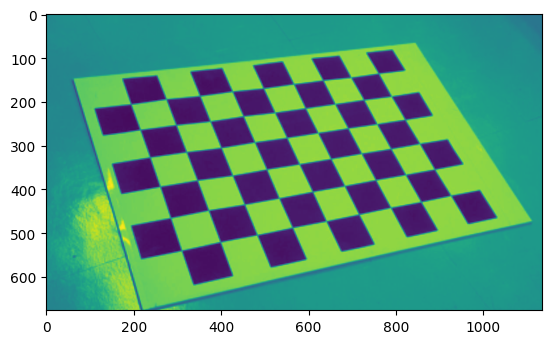

In [27]:
# Step 1: Load a grayscale image and normalize
# ➤ Slide 5: Understanding image representation
image = cv2.imread('data/original.png', cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32) / 255.0 # Normalize to range [0, 1]
plt.imshow(image)

In [28]:
# Step 2: General Convolution Function
# ➤ Slide 8: C(j, k) = sum_l sum_m I(j + l, k + m) * K(l, m)
def convolve2d(image, kernel, padding=0, stride=1):
    # TODO 1: Flip kernel for convolution
    kernel = np.flipud(np.fliplr(kernel))
    
    # TODO 2: Apply zero-padding if padding > 0
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image
        
    # TODO 3: Calculate output height and width
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image_padded.shape
    
    # TODO 4: Slide the kernel across the image with stride
    out_height = (image_height - kernel_height) // stride + 1
    out_width = (image_width - kernel_width) // stride + 1

    # TODO 5: At each position, compute the sum of element-wise multiplication
    output = np.zeros((out_height, out_width)) 
    for y in range(0, out_height):
        for x in range(0, out_width):
            region = image_padded[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            output[y, x] = np.sum(region * kernel)
            
    return output

In [29]:
# Step 3: Define edge detection filters
# ➤ Slide 6: Vertical & Horizontal edge filters
vertical_filter = np.array([
[-1, 0, 1],
[-1, 0, 1],
[-1, 0, 1]
], dtype=np.float32)

horizontal_filter = np.array([
[-1, -1, -1],
[0, 0, 0],
[1, 1, 1]
], dtype=np.float32)

In [ ]:
# Step 4: Convolve image with filters (padding=1, stride=1)
# ➤ Slide 7: Padding helps preserve image size
vertical_edges = convolve2d(image, vertical_filter, padding=1)
horizontal_edges = convolve2d(image, horizontal_filter, padding=1)

# Try strided convolutions (padding=1, stride=2)
# ➤ Slide 8: Stride reduces spatial resolution
vertical_stride = convolve2d(image, vertical_filter, padding=1, stride=2)
horizontal_stride = convolve2d(image, horizontal_filter, padding=1, stride=2)

In [ ]:
# Step 5: Visualization and Binarization function for black-and-white display
def binarize(img, threshold=0.5):
    img = img - np.min(img)
    if np.max(img) != 0:
        img = img / np.max(img)
    return (img > threshold).astype(np.float32)

# Binarize results
vertical_edges_bin = binarize(vertical_edges)
horizontal_edges_bin = binarize(horizontal_edges)
vertical_stride_bin = binarize(vertical_stride)
horizontal_stride_bin = binarize(horizontal_stride)

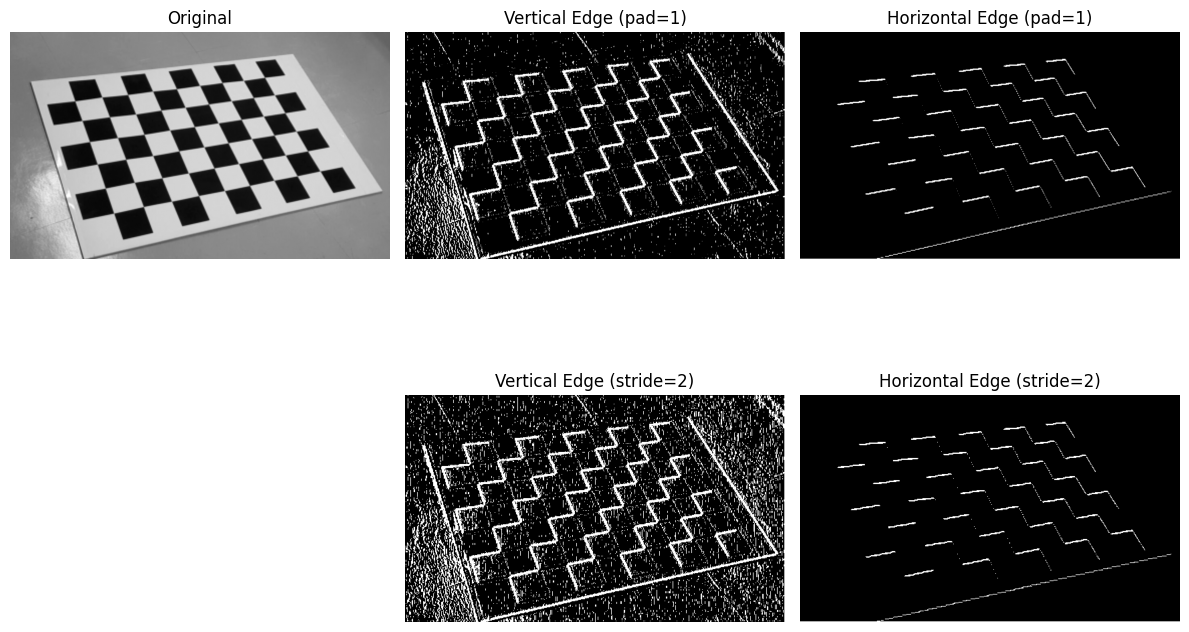

In [32]:
# Visualization
# TODO: Use matplotlib to show:
plt.figure(figsize=(12, 8))
# - Original image
plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

# - Vertical edges (pad=1)
plt.subplot(2, 3, 2)
plt.title("Vertical Edge (pad=1)")
plt.imshow(vertical_edges_bin, cmap='gray')
plt.axis('off')

# - Horizontal edges (pad=1)
plt.subplot(2, 3, 3)
plt.title("Horizontal Edge (pad=1)")
plt.imshow(horizontal_edges_bin, cmap='gray')
plt.axis('off')

# - Vertical edges (stride=2)
plt.subplot(2, 3, 5)
plt.title("Vertical Edge (stride=2)")
plt.imshow(vertical_stride_bin, cmap='gray')
plt.axis('off')

# - Horizontal edges (stride=2)
plt.subplot(2, 3, 6)
plt.title("Horizontal Edge (stride=2)")
plt.imshow(horizontal_stride_bin, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
